Shape of X: (10000, 2)
Shape of y: (10000,)


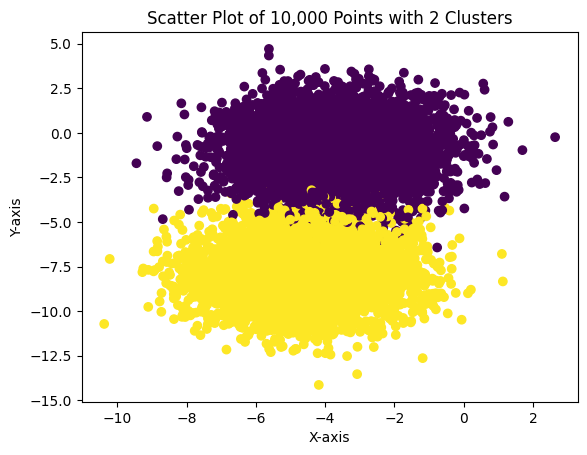

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(420)

# Create dataset with 10,000 points and 2 clusters
X, y = make_blobs(n_samples=10000, centers=2, cluster_std=1.5)

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Create scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y)

# Add axis labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of 10,000 Points with 2 Clusters')

# Show the plot
plt.show()


In [5]:
import collections

new_y = np.array(y[:1000])
collections.Counter(new_y)

Counter({0: 526, 1: 474})

In [6]:
labeled_X = np.array(X[:1000])
unlabeled_X = np.array(X[1000:])

unlabeled_X.shape


(9000, 2)

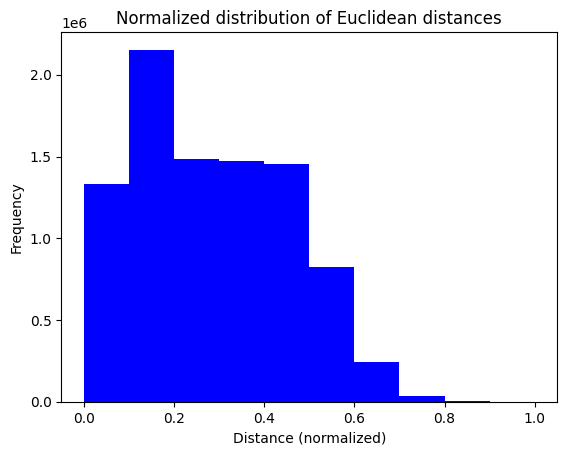

(9000, 1000)

In [8]:
import math
import seaborn as sns

labeled_distances = [[0 for j in range(len(labeled_X))] for i in range(len(unlabeled_X))]

for i in range(len(unlabeled_X)):
    for j in range(len(labeled_X)):
        if i == j:
            labeled_distances[i][j] = 0
        else:
            labeled_distances[i][j] = math.sqrt((labeled_X[j][0] - unlabeled_X[i][0])**2 + (labeled_X[j][1] - unlabeled_X[i][1])**2)

# Normalize the distances
max_distance = np.max(labeled_distances)
normalized_distances = labeled_distances / max_distance

# Plot the normalized distribution of distances using a histogram
plt.hist(normalized_distances.flatten(), bins=10, color='blue')

# Set the x and y axis labels and title
plt.xlabel('Distance (normalized)')
plt.ylabel('Frequency')
plt.title('Normalized distribution of Euclidean distances')

# Show the plot
plt.show()

len(labeled_distances[0])

labeled_dist_matrix = np.array(labeled_distances)

labeled_dist_matrix.shape

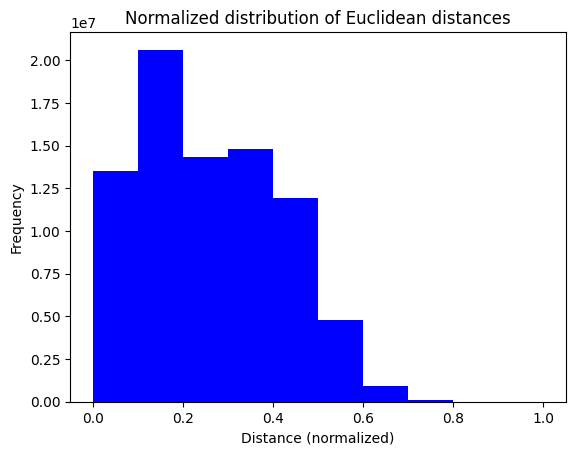

(9000, 9000)

In [15]:
from scipy.spatial.distance import cdist

unlabeled_distances = cdist(unlabeled_X, unlabeled_X)

# Normalize the distances
max_distance = np.max(unlabeled_distances)
normalized_distances = unlabeled_distances / max_distance

# Plot the normalized distribution of distances using a histogram
plt.hist(normalized_distances.flatten(), bins=10, color='blue')

# Set the x and y axis labels and title
plt.xlabel('Distance (normalized)')
plt.ylabel('Frequency')
plt.title('Normalized distribution of Euclidean distances')

# Show the plot
plt.show()

unlabeled_distances.shape


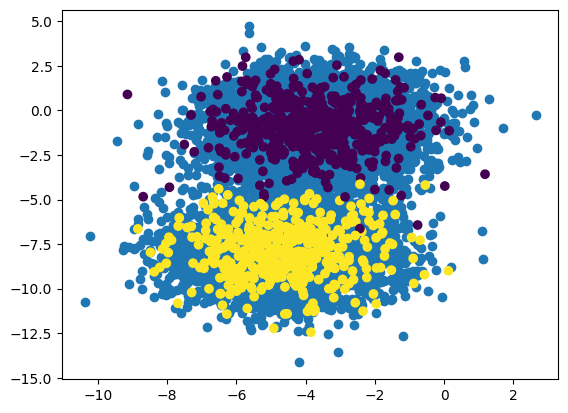

In [16]:
plt.scatter(unlabeled_X[:, 0], unlabeled_X[:, 1])
plt.scatter(labeled_X[:, 0], labeled_X[:, 1], c=new_y)

plt.show()

In [11]:
def weight(dist):
    return math.e**(-10*dist**2)

In [17]:
for row in unlabeled_distances:
    for el in row:
        el = weight(el)

print(unlabeled_distances)

[[0.         7.41187716 2.31005547 ... 3.73095559 1.73966624 6.95138187]
 [7.41187716 0.         5.47580794 ... 6.38653607 8.83635227 0.63098436]
 [2.31005547 5.47580794 0.         ... 2.1421987  4.03173512 4.93995719]
 ...
 [3.73095559 6.38653607 2.1421987  ... 0.         5.39291453 5.76890033]
 [1.73966624 8.83635227 4.03173512 ... 5.39291453 0.         8.431594  ]
 [6.95138187 0.63098436 4.93995719 ... 5.76890033 8.431594   0.        ]]


In [22]:
X = np.linspace(-2, 2, 9000)
plt.figure(dpi=100)
ax = plt.gca()
ax.legend_= None
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.set_ylabel('weight')
ax.set_xlabel('distance')
ax.axvline(x=0, color='k')
ax.plot(X, unlabeled_distances, label="asd")

 ...]

Error in callback <function _draw_all_if_interactive at 0x17e121c10> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x17e14c040> (for post_execute):


KeyboardInterrupt: 